In [1]:
import os
import pickle

from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
input_dir = './dataset'
categories = ['AI-generated', 'Digital-painting', 'Drawing', 'Photographic']

In [3]:
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(category_idx)

In [4]:
data = np.asarray(data, dtype=np.float32)
labels = np.asarray(labels, dtype=np.int32)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [6]:
classifier = SVC()

parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(classifier, parameters)

# if file model.p exists, load it
if os.path.isfile('./model.p'):
    grid_search = pickle.load(open('./model.p', 'rb'))
else:
    grid_search.fit(x_train, y_train)

In [8]:
# test performance
if os.path.isfile('./model.p'):
    best_estimator = grid_search
else:
    best_estimator = grid_search.best_estimator_

y_prediction = best_estimator.predict(x_test)

score = accuracy_score(y_prediction, y_test)

print('{}% of samples were correctly classified'.format(str(score * 100)))

pickle.dump(best_estimator, open('./model.p', 'wb'))

86.35394456289978% of samples were correctly classified


In [14]:
# test on new test data
test_dir = './multi_class_test/'
test_data = []
test_labels = []
for file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, file)
    img = imread(img_path)
    img = resize(img, (15, 15))
    test_data.append(img.flatten())
    # label is file name
    test_labels.append(file)

test_data = np.asarray(test_data, dtype=np.float32)

y_prediction = best_estimator.predict(test_data)


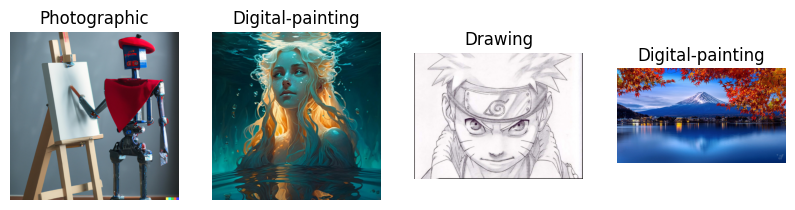

In [16]:
# show images and predictions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(10, 10))
for i in range(len(test_data)):
    img = mpimg.imread(os.path.join(test_dir, test_labels[i]))
    fig.add_subplot(1, len(test_data), i + 1)
    plt.imshow(img)
    plt.title(categories[y_prediction[i]])
    plt.axis('off')
plt.show()